In [1]:
import networkx as nx
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# build directed graph with edge-list
G = nx.read_edgelist(
    path='week11_fish_trade_edges.txt', 
    comments='#', 
    create_using=nx.DiGraph, 
    nodetype=int, 
    data=(('millions_of_dollars_A_to_B', float), ), 
    edgetype=float)

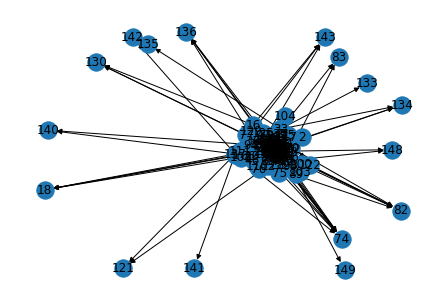

In [3]:
# plot the graph
pos = nx.spring_layout(G)
nx.draw(G, 
        pos=pos, 
        cmap = plt.get_cmap('rainbow'), 
        with_labels=True)

In [4]:
# read country list into a dict
mapping = {}
with open('week11_fish_trade_countries_key.txt', 'r') as f:
    for i, line in enumerate(f):
        # read from the secod line, skip the header
        if i >= 1:
            (key, val) = line.rstrip().split(None, 1)
            key, val = int(key), val[1:-1]
            mapping[int(key)] = val

# relabel the nodes with country names
G = nx.relabel_nodes(G, mapping)

In [5]:
num_nodes, num_edges = G.number_of_nodes(), G.number_of_edges()
largest_scc = max(nx.strongly_connected_components(G), 
                  key=len)
largest_scc_percent = len(largest_scc) / num_nodes * 100

print('The size of the largest SCC is {}.'.format(len(largest_scc)))
print('This SCC contains {:.2f}% of all the nodes.'.format(
    largest_scc_percent))

The size of the largest SCC is 130.
This SCC contains 86.09% of all the nodes.


In [6]:
distances = nx.shortest_path_length(G, source='Germany')
print(distances)

{'Germany': 0, 'Sweden': 1, 'Latvia': 1, 'Ukraine': 1, 'Haiti': 1, 'Slovakia': 1, 'Malta': 1, 'Singapore': 1, 'Romania': 1, 'Philippines': 1, 'Argentina': 1, 'Yugoslavia': 1, 'Thailand': 1, 'Hungary': 1, 'Taiwan': 1, 'Belarus': 1, 'Dominican Rp': 1, 'Malaysia': 1, 'Austria': 1, 'Switz.Liecht': 1, 'Russian Fed': 1, 'Egypt': 1, 'Norway': 1, 'Poland': 1, 'Denmark': 1, 'China': 1, 'Saudi Arabia': 1, 'Brazil': 1, 'Greece': 1, 'France,Monac': 1, 'Bosnia Herzg': 1, 'Mali': 1, 'Lithuania': 1, 'Cyprus': 1, 'Ireland': 1, 'Turkey': 1, 'UK': 1, 'Spain': 1, 'Israel': 1, 'Lebanon': 1, 'China HK SAR': 1, 'Estonia': 1, 'Portugal': 1, 'Bulgaria': 1, 'Netherlands': 1, 'Venezuela': 1, 'USA': 1, 'Japan': 1, 'Croatia': 1, 'South Africa': 1, 'Czech Rep': 1, 'Finland': 1, 'Canada': 1, 'Ghana': 1, 'Slovenia': 1, 'Italy': 1, 'Belgium-Lux': 1, 'Australia': 1, 'Kazakhstan': 2, 'Indonesia': 2, 'Mauritius': 2, 'Untd Arab Em': 2, 'Viet Nam': 2, 'Korea Rep.': 2, 'Bahrain': 2, 'Seychelles': 2, 'New Zealand': 2, 'Sri 

In [7]:
recip_ratio = nx.algorithms.reciprocity(G) * 100
print('reciprocity percentage: {:.3f}%'.format(recip_ratio))

reciprocity percentage: 46.720%


In [8]:
in_degrees = G.in_degree(list(G))
in_degrees_sorted = sorted(in_degrees, 
                           key=lambda tup: tup[1], 
                           reverse=True)
print(list(in_degrees_sorted)[:10])

[('Japan', 95), ('USA', 92), ('France,Monac', 91), ('Germany', 85), ('Spain', 83), ('Italy', 81), ('UK', 76), ('Netherlands', 75), ('China HK SAR', 70), ('Belgium-Lux', 68)]


In [9]:
exports = G.out_degree(list(G), 
                       weight='millions_of_dollars_A_to_B')
exports = sorted(exports, 
                 key=lambda tup: tup[1], 
                 reverse=True)
print(list(exports)[:10])

[('Thailand', 4046.182999999998), ('Norway', 3513.283), ('China', 3059.796), ('USA', 2553.9380000000006), ('Canada', 2474.0610000000006), ('Russian Fed', 2445.563000000001), ('Denmark', 2138.935), ('Indonesia', 2059.5260000000003), ('Netherlands', 1608.1300000000006), ('Chile', 1418.516)]


In [10]:
out_degrees = G.out_degree(list(G))
out_in_diff = [(x[0], abs(y[1] - x[1])) \
               for x, y in zip(in_degrees, out_degrees)]
diff_sorted = sorted(out_in_diff, 
                     key=lambda tup: tup[1], 
                     reverse=True)
print(diff_sorted[:10])

[('Morocco', 53), ('China HK SAR', 50), ('Norway', 47), ('Chile', 47), ('India', 44), ('Japan', 41), ('Belgium-Lux', 39), ('Switz.Liecht', 39), ('Argentina', 37), ('Taiwan', 35)]


In [11]:
Graphs = []
probs = [0.0, 0.2, 0.4, 0.5, 0.8, 1.0]
for p in probs:
    # at the beginning, add nodes and edges manually
    G = nx.Graph()
    G.add_nodes_from([0, 1, 2])
    G.add_edges_from([(0, 1), (1, 2), (2, 0)])

    for n in range(3, 20000):
        # construct a new node
        G.add_node(n)

        # randomly select an existing node
        o = np.random.randint(low=0, high=n)

        # add a new edge
        flag = np.random.binomial(n=1, p=p)
        if flag:
            G.add_edge(n, o)
        else:
            # randomly select one node from the neighbors
            neighbors = list(G.neighbors(o))           
            ot_loc = np.random.randint(low=0, high=len(neighbors))
            ot = neighbors[ot_loc]

            # add a new edge
            G.add_edge(n, ot)
    
    Graphs.append(G)

In [36]:
# plot the distribution
fig, ax = plt.subplots()
plt.title('degree distribution')
plt.xlabel('degree')
plt.ylabel('normalized count')

for p, G in zip(probs, Graphs):
    degrees = list(G.degree())
    plt.hist(degrees)

plt.legend()
plt.show()

In [13]:
# build directed graph with edge-list from imdb
G = nx.read_weighted_edgelist(
    path='week11_imdb_actor_edges.tsv',  
    create_using=nx.Graph, 
    nodetype=int)

In [14]:
# read tsv. file for actors
df = pd.read_csv('week11_imdb_actors_key.tsv', 
                 sep='\t', 
                 encoding='iso-8859-1')
print(df.head())

ID                 name  movies_95_04 main_genre  \
0  15629  Rudder, Michael (I)            12   Thriller   
1   5026        Morgan, Debbi            16      Drama   
2  11252         Bellows, Gil            33      Drama   
3   5150         Dray, Albert            20     Comedy   
4   4057      Daly, Shane (I)            18      Drama   

                                              genres  
0  Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N...  
1  Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...  
2  Comedy:6,Documentary:1,Drama:7,Family:1,Fantas...  
3  Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,...  
4  Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musi...  


In [15]:
# build id-name dict from the dataframe
mapping = dict(zip(df['ID'], df['name']))

# relabel the nodes with country names
G = nx.relabel_nodes(G, mapping)

In [18]:
# compute degree centrality
deg_cens = nx.degree_centrality(G)

# sort by degree centrality
deg_cen_sorted = [
    (k, v) for k, v in sorted(
        deg_cens.items(), 
        key=lambda item: - item[1])
]

[('Davis, Mark (V)', 0.04460628129267183), ('Sanders, Alex (I)', 0.034706417842512514), ('North, Peter (I)', 0.03408056440600819), ('Marcus, Mr.', 0.03322712790168412), ('Tedeschi, Tony', 0.03191852526172053), ('Dough, Jon', 0.0315771506599909), ('Stone, Lee (II)', 0.03100819299044151), ('Voyeur, Vince', 0.030325443786982247), ('Lawrence, Joel (II)', 0.028447883477469276), ('Steele, Lexington', 0.028049613108784708), ('Ashley, Jay', 0.02787892580791989), ('Boy, T.T.', 0.02702548930359581), ('Cannon, Chris (III)', 0.026797906235776058), ('Jeremy, Ron', 0.026797906235776058), ('Bune, Tyce', 0.02634274010013655), ('Hanks, Tom', 0.02600136549840692), ('Michaels, Sean', 0.02565999089667729), ('Stone, Kyle', 0.02560309512972235), ('Hardman, Dave', 0.024920345926263087), ('Surewood, Brian', 0.0243513882567137)]


In [29]:
# get the list of top-20 actors by degree centrality
deg_cen_actors = [actor for (actor, _) in deg_cen_sorted[:20]]
print(df.loc[df['name'].isin(deg_cen_actors)])

# get average of the number of films from the actors
avg1 = df.loc[df['name'].isin(deg_cen_actors)]['movies_95_04'].mean()
avg2 = df.loc[~df['name'].isin(deg_cen_actors)]['movies_95_04'].mean()

# print the results
print('Average of the numbers of the films from top-20 and others:')
print('{:.2f} vs {:.2f}'.format(avg1, avg2))

Average of the numbers of the films from top-20 and others:
336.50 vs 20.19


In [30]:
# compute betweenness centrality
bet_cens = nx.betweenness_centrality(G)

# sort by between centrality
bet_cen_sorted = [
    (k, v) for k, v in sorted(
        bet_cens.items(), 
        key=lambda item: - item[1])
]
print(list(bet_cen_sorted)[:20])

[('Jeremy, Ron', 0.06311816785530817), ('Chan, Jackie (I)', 0.030540218891850483), ('Cruz, Penélope', 0.028039420524390554), ('Shahlavi, Darren', 0.02781176968881156), ('Del Rosario, Monsour', 0.027627868596802177), ('Depardieu, Gérard', 0.026140366937659813), ('Bachchan, Amitabh', 0.016641386206653782), ('Jackson, Samuel L.', 0.016443047499191198), ('Soualem, Zinedine', 0.015332976668312877), ('Del Rio, Olivia', 0.014997740581500827), ('Jaenicke, Hannes', 0.01383614546185728), ('Hayek, Salma', 0.013709304239533837), ('Pelé', 0.01358690036264513), ('Knaup, Herbert', 0.013354462028374592), ('Goldberg, Whoopi', 0.01328347914780489), ('Roth, Cecilia', 0.013073867163640217), ('Bellucci, Monica', 0.012989528309417287), ('Hanks, Tom', 0.0128019666737396), ('August, Pernilla', 0.01254369332368303), ('Kier, Udo', 0.012426493744246963)]


In [33]:
bet_cen_actors = [actor for (actor, _) in bet_cen_sorted[:20]]
print(df.loc[df['name'].isin(bet_cen_actors)])

ID                  name  movies_95_04 main_genre  \
246     3075      Bellucci, Monica            43      Drama   
559     2549      Jaenicke, Hannes            66   Thriller   
568    13698                  Pelé            10    Romance   
1531    5295             Kier, Udo            69      Drama   
2563     564        Cruz, Penélope            46      Drama   
4157    4628        Knaup, Herbert            50      Drama   
4524     701            Hanks, Tom            75     Family   
4693    3284      Chan, Jackie (I)            59     Comedy   
5517    5083     Soualem, Zinedine            65     Comedy   
5906    1057      August, Pernilla            31      Drama   
8799   13723     Bachchan, Amitabh            35    Romance   
9655    3213      Goldberg, Whoopi           109     Comedy   
10412   1529    Jackson, Samuel L.            97      Drama   
10548   2108           Jeremy, Ron           280      Adult   
13349   4550         Roth, Cecilia            23      Drama   
14

In [34]:
# compute closeness centrality
cls_cens = nx.closeness_centrality(G)

# sort by closeness centrality
cls_cen_sorted = [
    (k, v) for k, v in sorted(
        cls_cens.items(), 
        key=lambda item: - item[1])
]
print(list(cls_cen_sorted)[:20])

[('Jackson, Samuel L.', 0.307118500923071), ('Goldberg, Whoopi', 0.30562387524192614), ('Berry, Halle', 0.3037812509700012), ('Diaz, Cameron', 0.30354716794093545), ('Hanks, Tom', 0.30311188354223034), ('Stiller, Ben', 0.3026038659298409), ('Myers, Mike (I)', 0.3005105384478546), ('Douglas, Michael (I)', 0.3005053283967363), ('Lopez, Jennifer (I)', 0.2991258406522626), ('De Niro, Robert', 0.2986207955583853), ('Willis, Bruce (I)', 0.29839973206272347), ('Cruise, Tom', 0.2983226938709378), ('Hopper, Dennis', 0.29725851646564605), ('Kidman, Nicole', 0.29669371510776027), ('Smith, Will (I)', 0.2964805657794013), ('Washington, Denzel', 0.2964754945280837), ('Travolta, John', 0.2964400006258826), ('Madonna (I)', 0.29628798011274116), ('Schwarzenegger, Arnold', 0.2956764101021026), ('Hoffman, Dustin', 0.29551509448102153)]


In [35]:
cls_cen_actors = [actor for (actor, _) in cls_cen_sorted[:20]]
print(df.loc[df['name'].isin(cls_cen_actors)])

ID                    name  movies_95_04 main_genre  \
708    3907         Myers, Mike (I)            58     Comedy   
1090    689  Schwarzenegger, Arnold            70     Family   
3542   2674     Lopez, Jennifer (I)            68      Music   
3588    503           Diaz, Cameron            59      Drama   
4516   3169       Willis, Bruce (I)            52   Thriller   
4524    701              Hanks, Tom            75     Family   
5907   3308    Douglas, Michael (I)            41     Family   
6322   3930         Hoffman, Dustin            56   Thriller   
8119   3268            Berry, Halle            63     Family   
8534    574          Kidman, Nicole            54     Family   
9198    716             Madonna (I)            61      Music   
9624   1459             Cruise, Tom            46      Music   
9655   3213        Goldberg, Whoopi           109     Comedy   
10169  3235          Travolta, John            63      Drama   
10412  1529      Jackson, Samuel L.            97